In [2]:
# reload magics
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [4]:
# load the data from the xlsx file
df = pd.read_excel('../lc-project-data/DATASET.xlsx')


## FEATURE SETS

In [23]:

df_columns = df.columns

## DEMO + HX

In [69]:
RECORDS = ["record_id"]


# demographics etc
DEMOGRAPHICS = ["sex", "age", "home_location", "living_with", "number_of_persons_in_house"]

GEOGRAPHY = ["country"]
EMPLOYMENT = ["employed", "occupation", "hcp", "micro"]

# substances
SUBSTANCES = [col for col in df_columns if "substances___" in col]

# find all columns with hhx in the name
HEALTH = ["global"]
HEALTH_HX = [col for col in df_columns if "hhx" in col]

# medications
MEDICATIONS = [col for col in df_columns if "medication" in col]

# PHX completeness
PHX_COMPLETE = ["phx_complete"]

# GAD
GAD = [col for col in df_columns if "_gad" in col]

# PROMIS
PROMIS = [col for col in df_columns if "promis29" in col]
PROMIS_COMPLETE = [col for col in df_columns if "promis_29_profile" in col]

# PHQ
PHQ = [col for col in df_columns if "phq" in col]
PHQ_COMPLETE = [col for col in df_columns if "patient_health_questionaire" in col]




<Axes: >

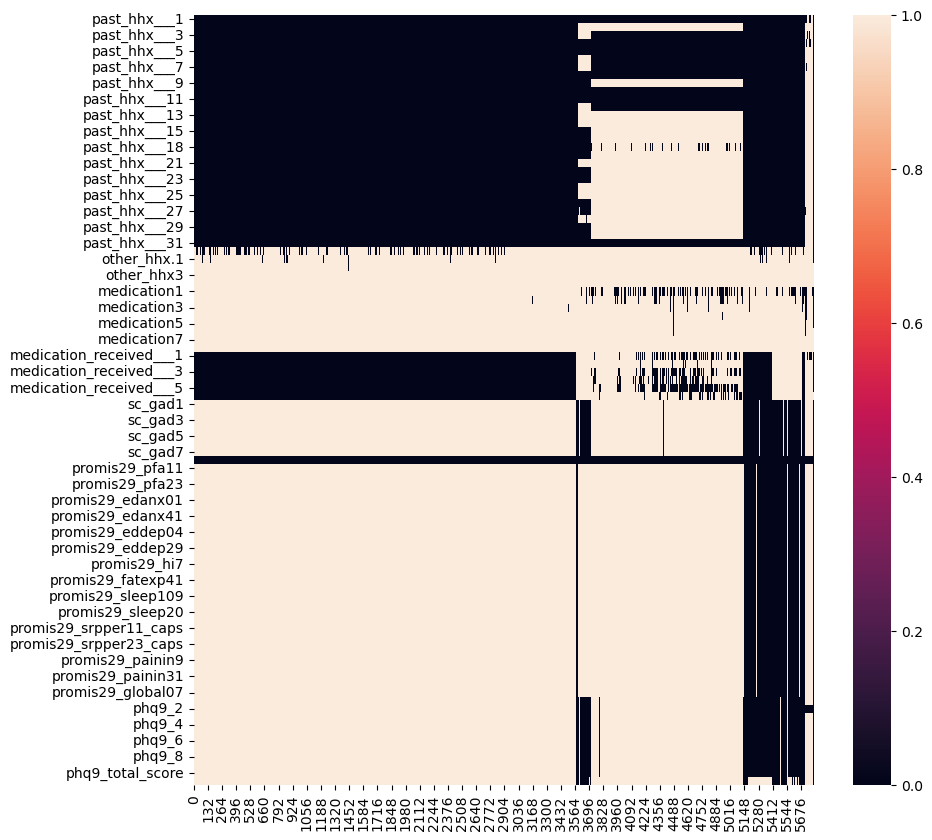

In [70]:

HX = HEALTH_HX + MEDICATIONS + GAD + PROMIS + PHQ

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df[HX].isnull().T, cbar=True, ax = ax)


In [71]:
# count countries
df["country"].value_counts()

country
16              2407
10               670
94                56
98                45
57                43
                ... 
65                 1
26                 1
17                 1
76                 1
 El Salvador       1
Name: count, Length: 100, dtype: int64

In [72]:
# count nulls by country
df.groupby("country")[HX].apply(lambda x: x.isnull().sum()).T

country,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,El Salvador
past_hhx___1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
past_hhx___2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
past_hhx___3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
past_hhx___4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
past_hhx___5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phq9_7,24,1,0,1,6,1,3,1,4,655,...,10,2,5,21,3,5,1,3,1,1
phq9_8,24,1,0,1,6,1,3,1,4,655,...,10,2,5,21,3,5,1,3,1,1
phq9_9,24,1,0,1,6,1,3,1,4,655,...,10,2,5,21,3,5,1,3,1,1
phq9_total_score,24,1,0,1,6,1,3,1,4,655,...,10,2,5,21,3,5,1,3,1,1


## CLINICAL TESTS


In [ ]:

s = "igg	wbc	neutrophil	neutrophil_count	lymphocyte	lymphocyte_count	monocyte	monocyte_count	eosinophil	eosinophil_count	basophil	basophil_count	platelets	haemoglobin	urea	creatinine	ntprobnp	bnp	sodium	potassium	crp	ldh	cpk	albumin		ast	alt	pct	troponinthigh	troponinihigh	troponint	troponini	aptt	inr	triglycerides	bilirubin	bilirubin_direct	glucose	fibrinogen	ferritin	il6	cd4	cd8	angiography	pocus	echocardiogram	echoresult	ekg	ekgresult	ekgcode	stented	cxr	cxrresult	cxrcode	cta	ctaresult	ctt	cttresult	cth	cthresult	imaging_results	imaging	spirometry	spirometryresult	metacholine	lung_function	lung_functionresult"
words = s.split()
words.sort()
CLINICAL_TESTS = words

CLIN_TESTS_COMPLETE = [col for col in df_columns if "clinical_tests_complete" in col]

In [75]:
df[CLINICAL_TESTS].describe()

KeyError: 'CLINICAL_TESTS'

<Axes: >

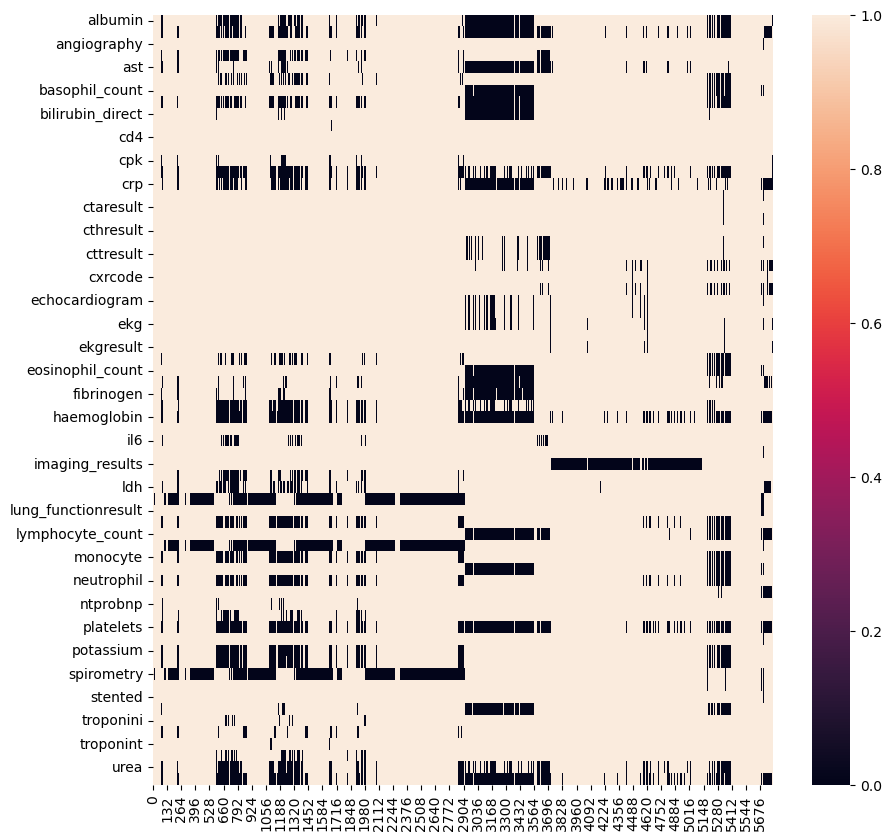

In [68]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df[CLINICAL_TESTS].isnull().T, cbar=True, ax = ax)

ValueError: could not convert string to float: '12 .1'

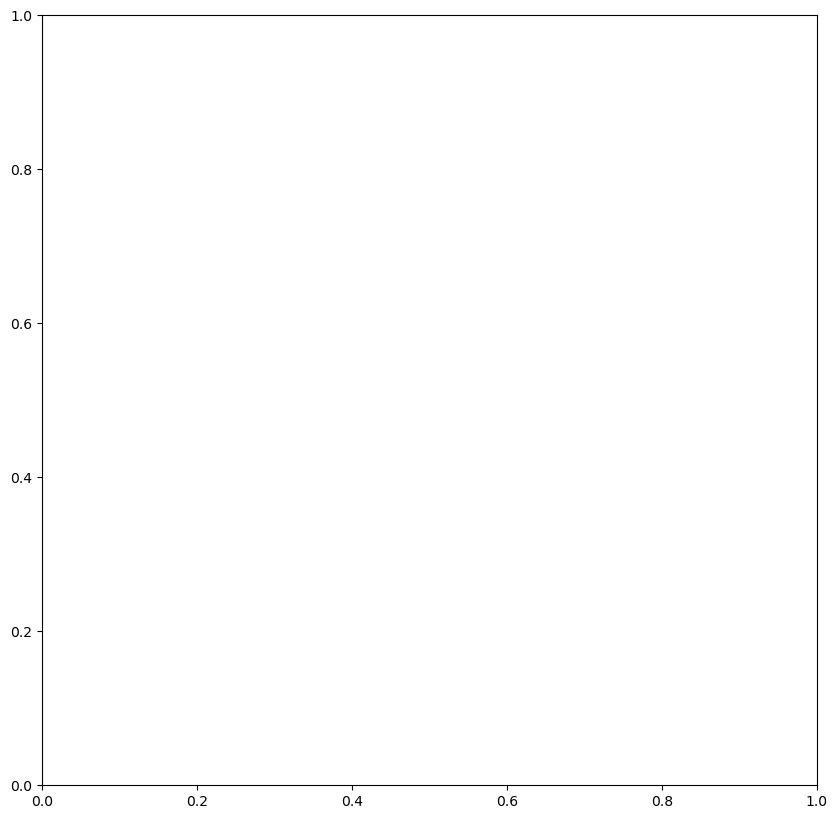

In [74]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df[CLINICAL_TESTS].T, cbar=True, ax = ax)

## VACCINES

In [47]:
VAX_STATUS = ["vaccinated"]


# given a list of substrings, find aall columns that contain the substrings
def find_columns(df_columns, substrings):
    return [col for col in df_columns if any(substring in col for substring in substrings)]

VAX = find_columns(df_columns, ["astra_zeneca", "pfizer", "moderna", "j_j", "sinoppharm", "sinovac", "sputnik", "other___"])

VAX_SIDE_EFFECTS = find_columns(df_columns, ["vac_sideeffect"])

<Axes: >

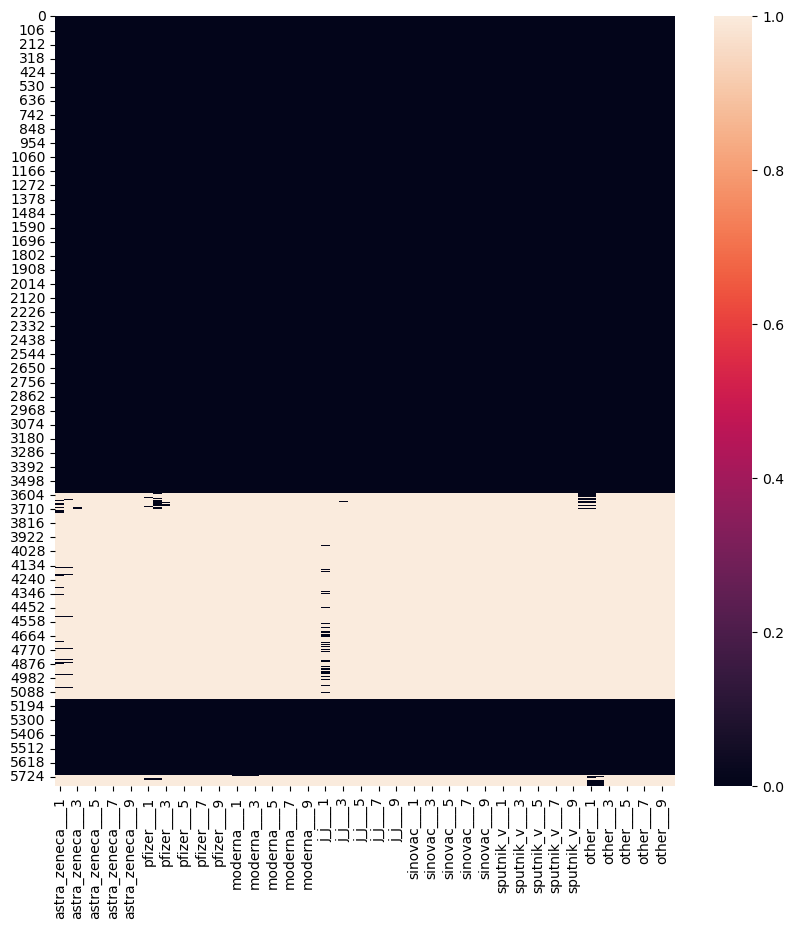

In [52]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df[VAX].isnull(), cbar=True, ax = ax)

## VIZ

<Axes: >

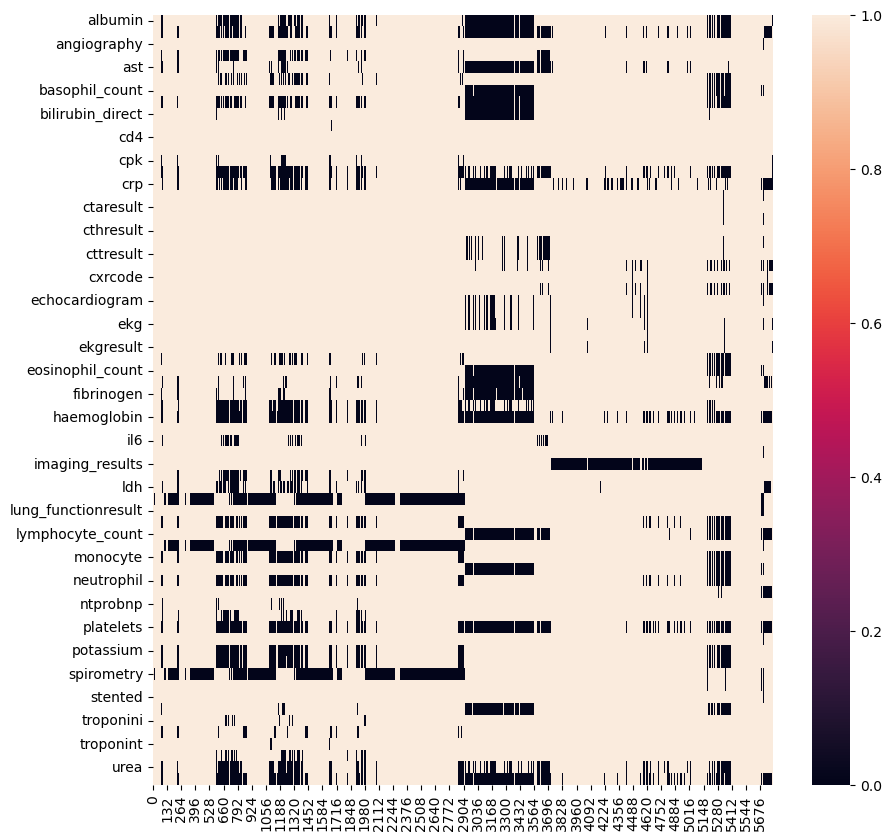

In [49]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df[CLINICAL_TESTS].isnull().T, cbar=True, ax = ax)

## PARTICIPANT TYPES

In [58]:
df['participant_type'].value_counts()

participant_type
7     1778
6     1607
10    1147
13     493
5      327
4      242
8       84
11      43
3       38
2       31
1        7
Name: count, dtype: int64

In [59]:
# LC_positive types
pos_vals =  [2,4,6,8,9,12,13]
neg_vals = [1,5,7,10,]
hc_vals = [3,11, 14,15]


In [60]:
LC_pos = df.query('participant_type in @pos_vals')
LC_neg = df.query('participant_type in @neg_vals')
HC = df.query('participant_type in @hc_vals')

In [61]:
df['LC_STATUS'] = df['participant_type'].apply(lambda x: 'LC_POS' if x in pos_vals else 'LC_NEG' if x in neg_vals else 'HC')

<Axes: xlabel='LC_STATUS', ylabel='age'>

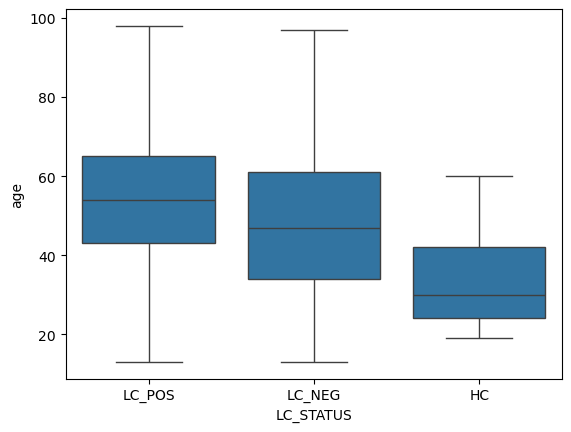

In [62]:
sns.boxplot(data=df, x='LC_STATUS', y='age')


In [16]:
LC_pos[biomarkers_list].shape

(2457, 2)

In [17]:
# clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from hdbscan import HDBSCAN
from umap import UMAP

hdb_ = HDBSCAN(min_cluster_size=10, min_samples=5)

umap_ = UMAP(n_components=2)

scaler = StandardScaler().set_output(transform = "pandas")



In [18]:
# drop all  columns of type object
df_num = df.select_dtypes(exclude=['object'])
df_num = df_num.select_dtypes(exclude=['datetime'])

df_num.shape

(5797, 640)

In [19]:
X = scaler.fit_transform(df_num.loc[LC_pos.index][biomarkers_list])
X.shape

(2457, 2)

In [20]:
# drop the NAs
X = X.dropna()
X.shape

(545, 2)

<Axes: >

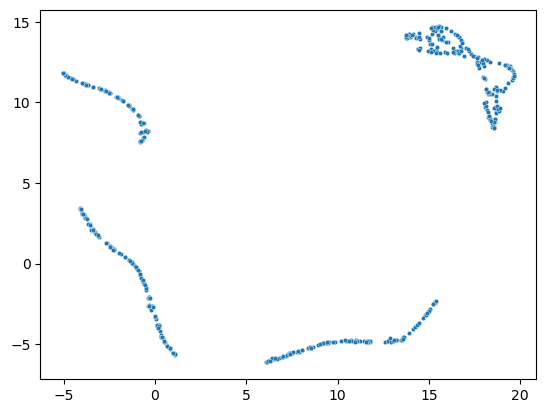

In [21]:
# umap

X_umap = umap_.fit_transform(X)
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], s=10)